In [2]:
import cv2



In [5]:
def save_stereo_img_left_and_right(stereo_img, i):
    # Separate into two images
    h, w, _ = stereo_img.shape
    mid = w // 2

    left_img = stereo_img[:, :mid]
    right_img = stereo_img[:, mid:]

    # Make folder names
    left_images_save_path = "left_images"
    right_images_save_path = "right_images"


    # Create the save path if it doesn't exist
    import os
    os.makedirs(left_images_save_path, exist_ok=True)
    os.makedirs(right_images_save_path, exist_ok=True)

    # Save
    left_img_file_name = f"{left_images_save_path}/left_img_{i + 1}.png"
    right_img_file_name = f"{right_images_save_path}/right_img_{i + 1}.png"

    # Save to file 
    cv2.imwrite(left_img_file_name, left_img)
    print(f"Image {i + 1} captured and separated as {left_img_file_name}")
    cv2.imwrite(right_img_file_name, right_img)
    print(f"Image {i + 1} captured and saved as {right_img_file_name}")


def list_available_cameras():
    # Try to open each camera index and print information
    for i in range(10):  # Try indices from 0 to 9
        cap = cv2.VideoCapture(i)
        if not cap.isOpened():
            break
        else:
            print(f"Camera Index {i}: {cap.get(cv2.CAP_PROP_FRAME_WIDTH)} x {cap.get(cv2.CAP_PROP_FRAME_HEIGHT)}")
            cap.release()

def capture_images(camera_index=0, num_images=10, save_path='captured_images'):
    print("Camera index: ", camera_index)
    # Create a VideoCapture object
    cap = cv2.VideoCapture(camera_index)

    # Check if the camera is opened successfully
    if not cap.isOpened():
        print("Error: Could not open camera.")
        return

    # Create the save path if it doesn't exist
    import os
    os.makedirs(save_path, exist_ok=True)

    print(f"Capturing {num_images} images from camera {camera_index}...")
    
    for i in range(num_images):
        # Capture frame-by-frame
        ret, frame = cap.read()

        # Display the frame
        cv2.imshow('Frame', frame)

        # Save the frame as an image
        image_filename = f"{save_path}/image_{i + 1}.png"
        cv2.imwrite(image_filename, frame)

        save_stereo_img_left_and_right(frame, i)

        print(f"Image {i + 1} captured and saved as {image_filename}")

        # Wait for a short time between captures (milliseconds)
        cv2.waitKey(500)

    # Release the VideoCapture object
    cap.release()

    # Close all OpenCV windows
    cv2.destroyAllWindows()

if __name__ == "__main__":
    # Specify the camera index (0 by default, which is usually the built-in webcam)
    # You may need to change the index if you have multiple cameras
    camera_index = 0

    # Number of images to capture
    num_images = 20

    # Specify the folder to save the captured images
    save_path = 'captured_images'

    list_available_cameras()

    # Call the capture_images function
    capture_images(camera_index, num_images, save_path)

Camera Index 0: 1344.0 x 376.0
Camera Index 1: 640.0 x 480.0
Camera index:  0
Capturing 20 images from camera 0...
Image 1 captured and separated as left_images/left_img_1.png
Image 1 captured and saved as right_images/right_img_1.png
Image 1 captured and saved as captured_images/image_1.png
Image 2 captured and separated as left_images/left_img_2.png
Image 2 captured and saved as right_images/right_img_2.png
Image 2 captured and saved as captured_images/image_2.png
Image 3 captured and separated as left_images/left_img_3.png
Image 3 captured and saved as right_images/right_img_3.png
Image 3 captured and saved as captured_images/image_3.png
Image 4 captured and separated as left_images/left_img_4.png
Image 4 captured and saved as right_images/right_img_4.png
Image 4 captured and saved as captured_images/image_4.png
Image 5 captured and separated as left_images/left_img_5.png
Image 5 captured and saved as right_images/right_img_5.png
Image 5 captured and saved as captured_images/image_5

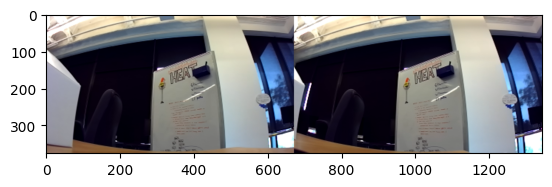

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('captured_images/image_10.png')
plt.imshow(img)
plt.show()

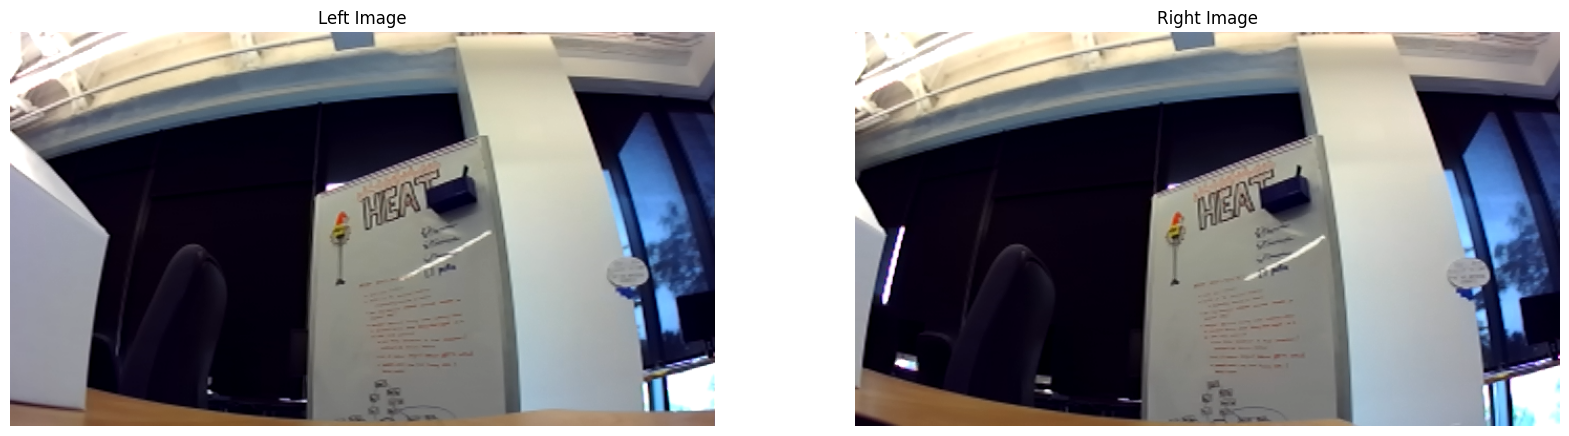

In [6]:
h, w, _ = img.shape
mid = w // 2

left_img = img[:, :mid]
right_img = img[:, mid:]

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].imshow(left_img)
axs[0].set_title("Left Image")
axs[0].axis('off')

axs[1].imshow(right_img)
axs[1].set_title("Right Image")
axs[1].axis('off')

plt.show()